Chequeamos los mapas de distintos shocks

Primero controlamos mapas de territorios

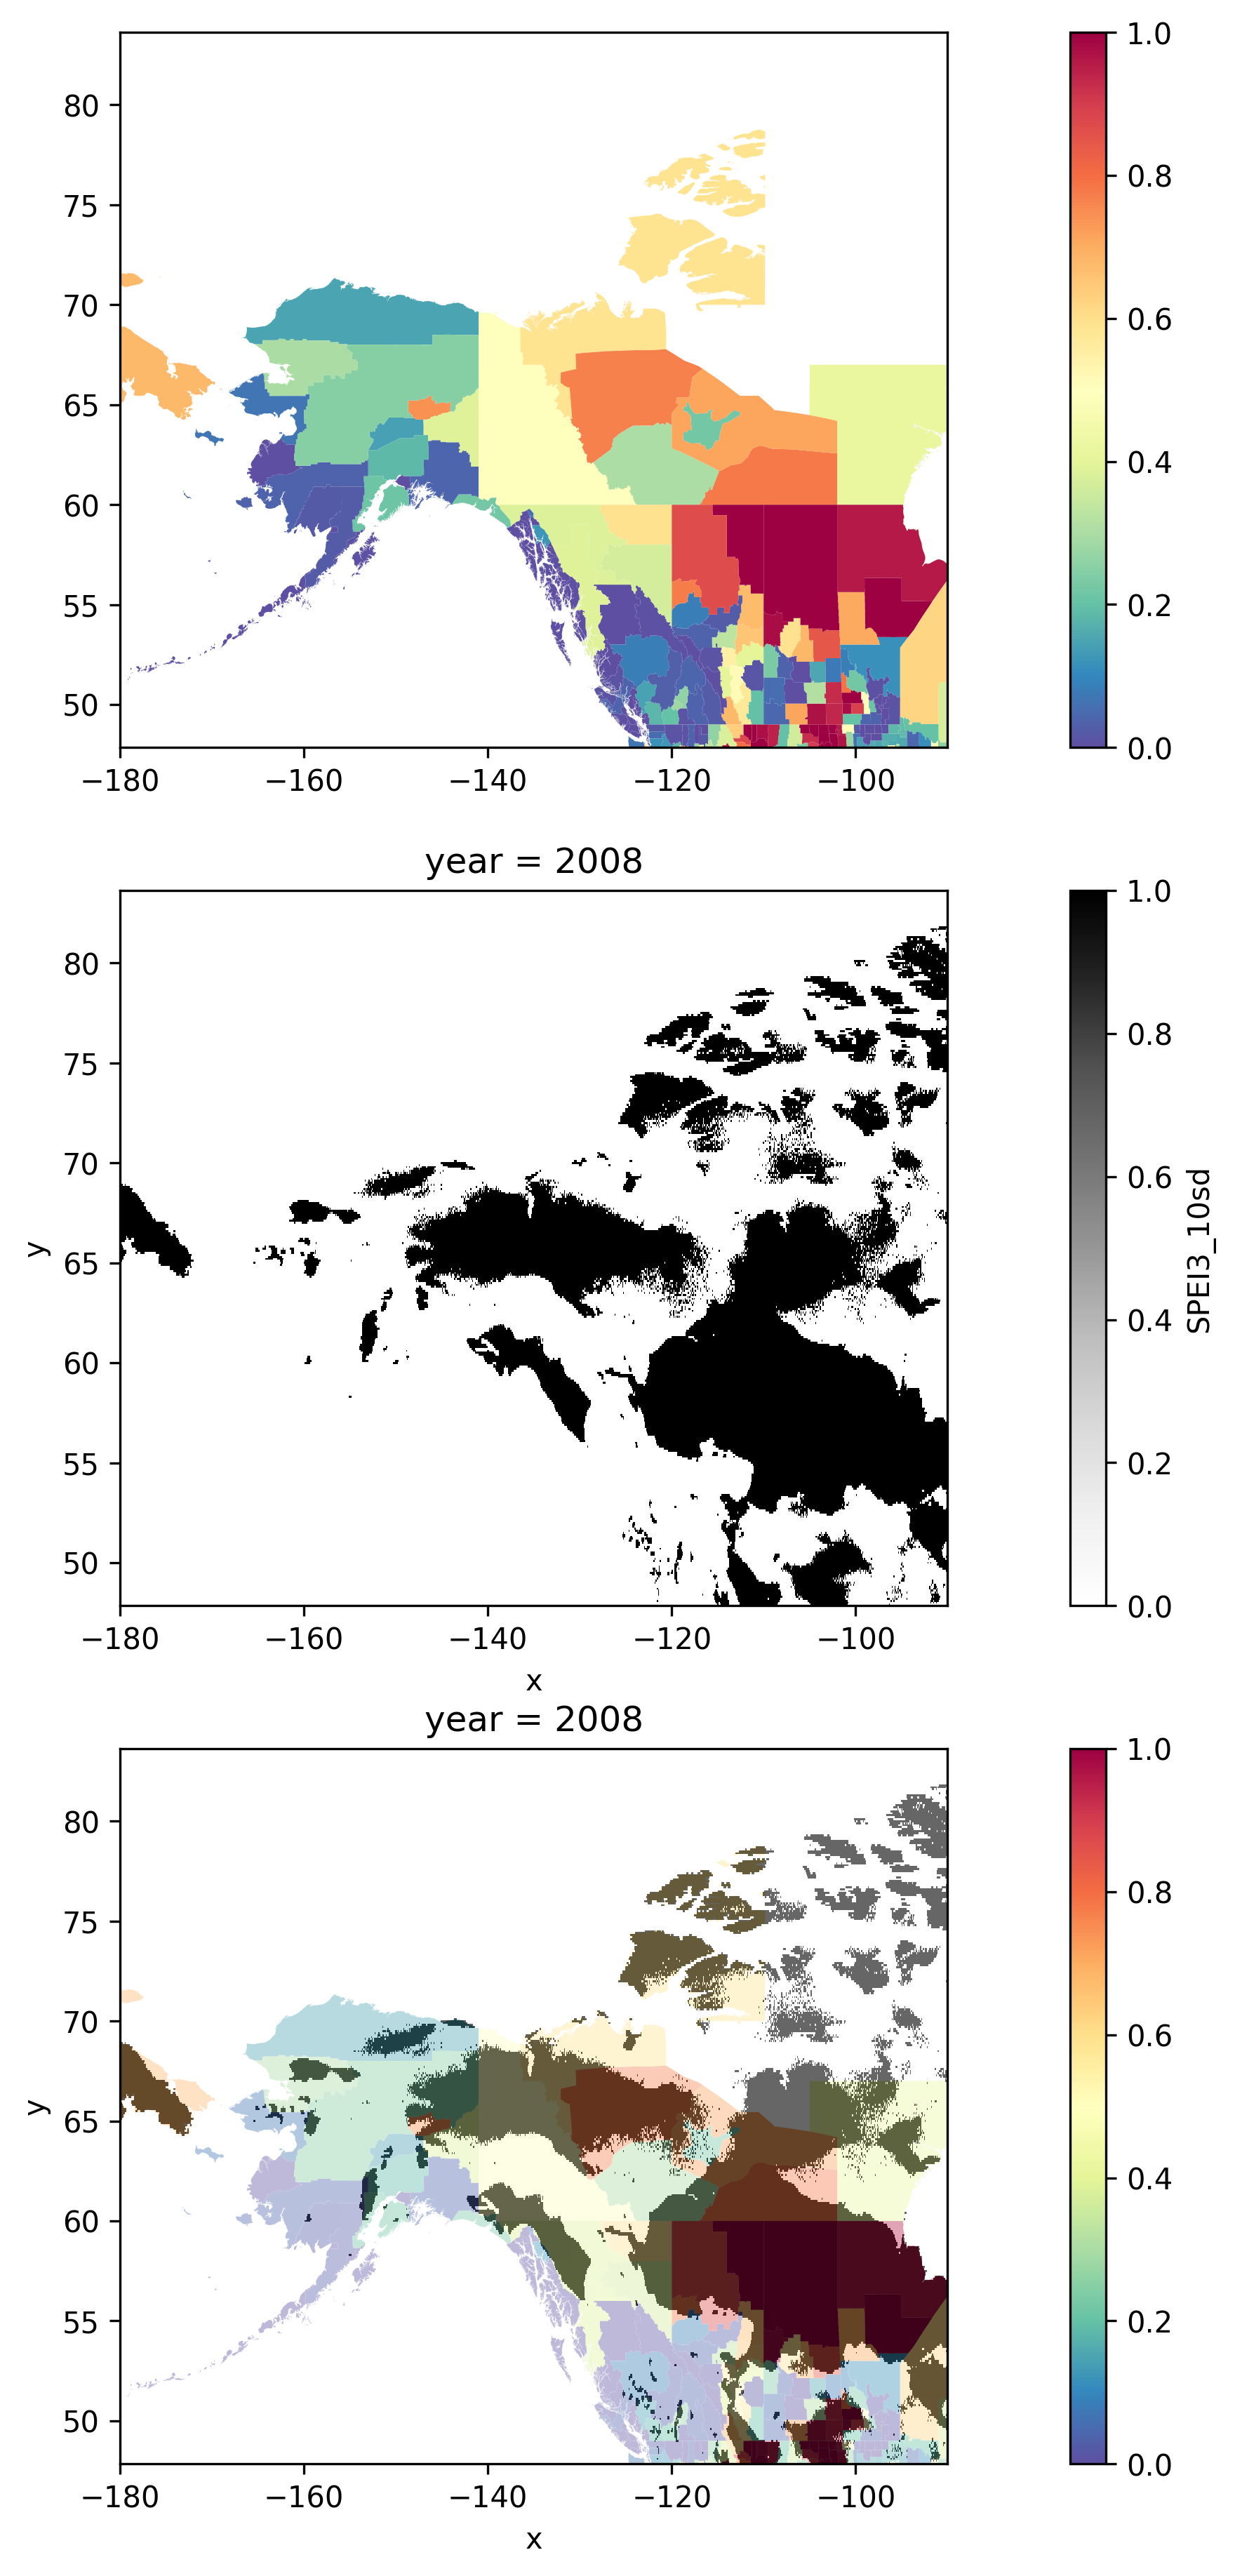

In [3]:
# Chequeamos sequias por territorio

import utils
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

PATH = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_RAW = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_PROC = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_OUT = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "drought"
chunk = 3
year = 2008
var = "SPEI3_10sd"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{var}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{DATA_PROC}\WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)

ds = xr.open_dataset(rf"{DATA_OUT}\ERA5_droughts_{year}.nc")
chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))


### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="area_affected", ax=axs[1], legend=False, cmap="Spectral_r", alpha=0) # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")
ds[f"{var}"].plot(ax=axs[1], cmap="Greys")
ds[f"{var}"].plot(ax=axs[2], cmap="Greys", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[1], chunk_bounds[3])


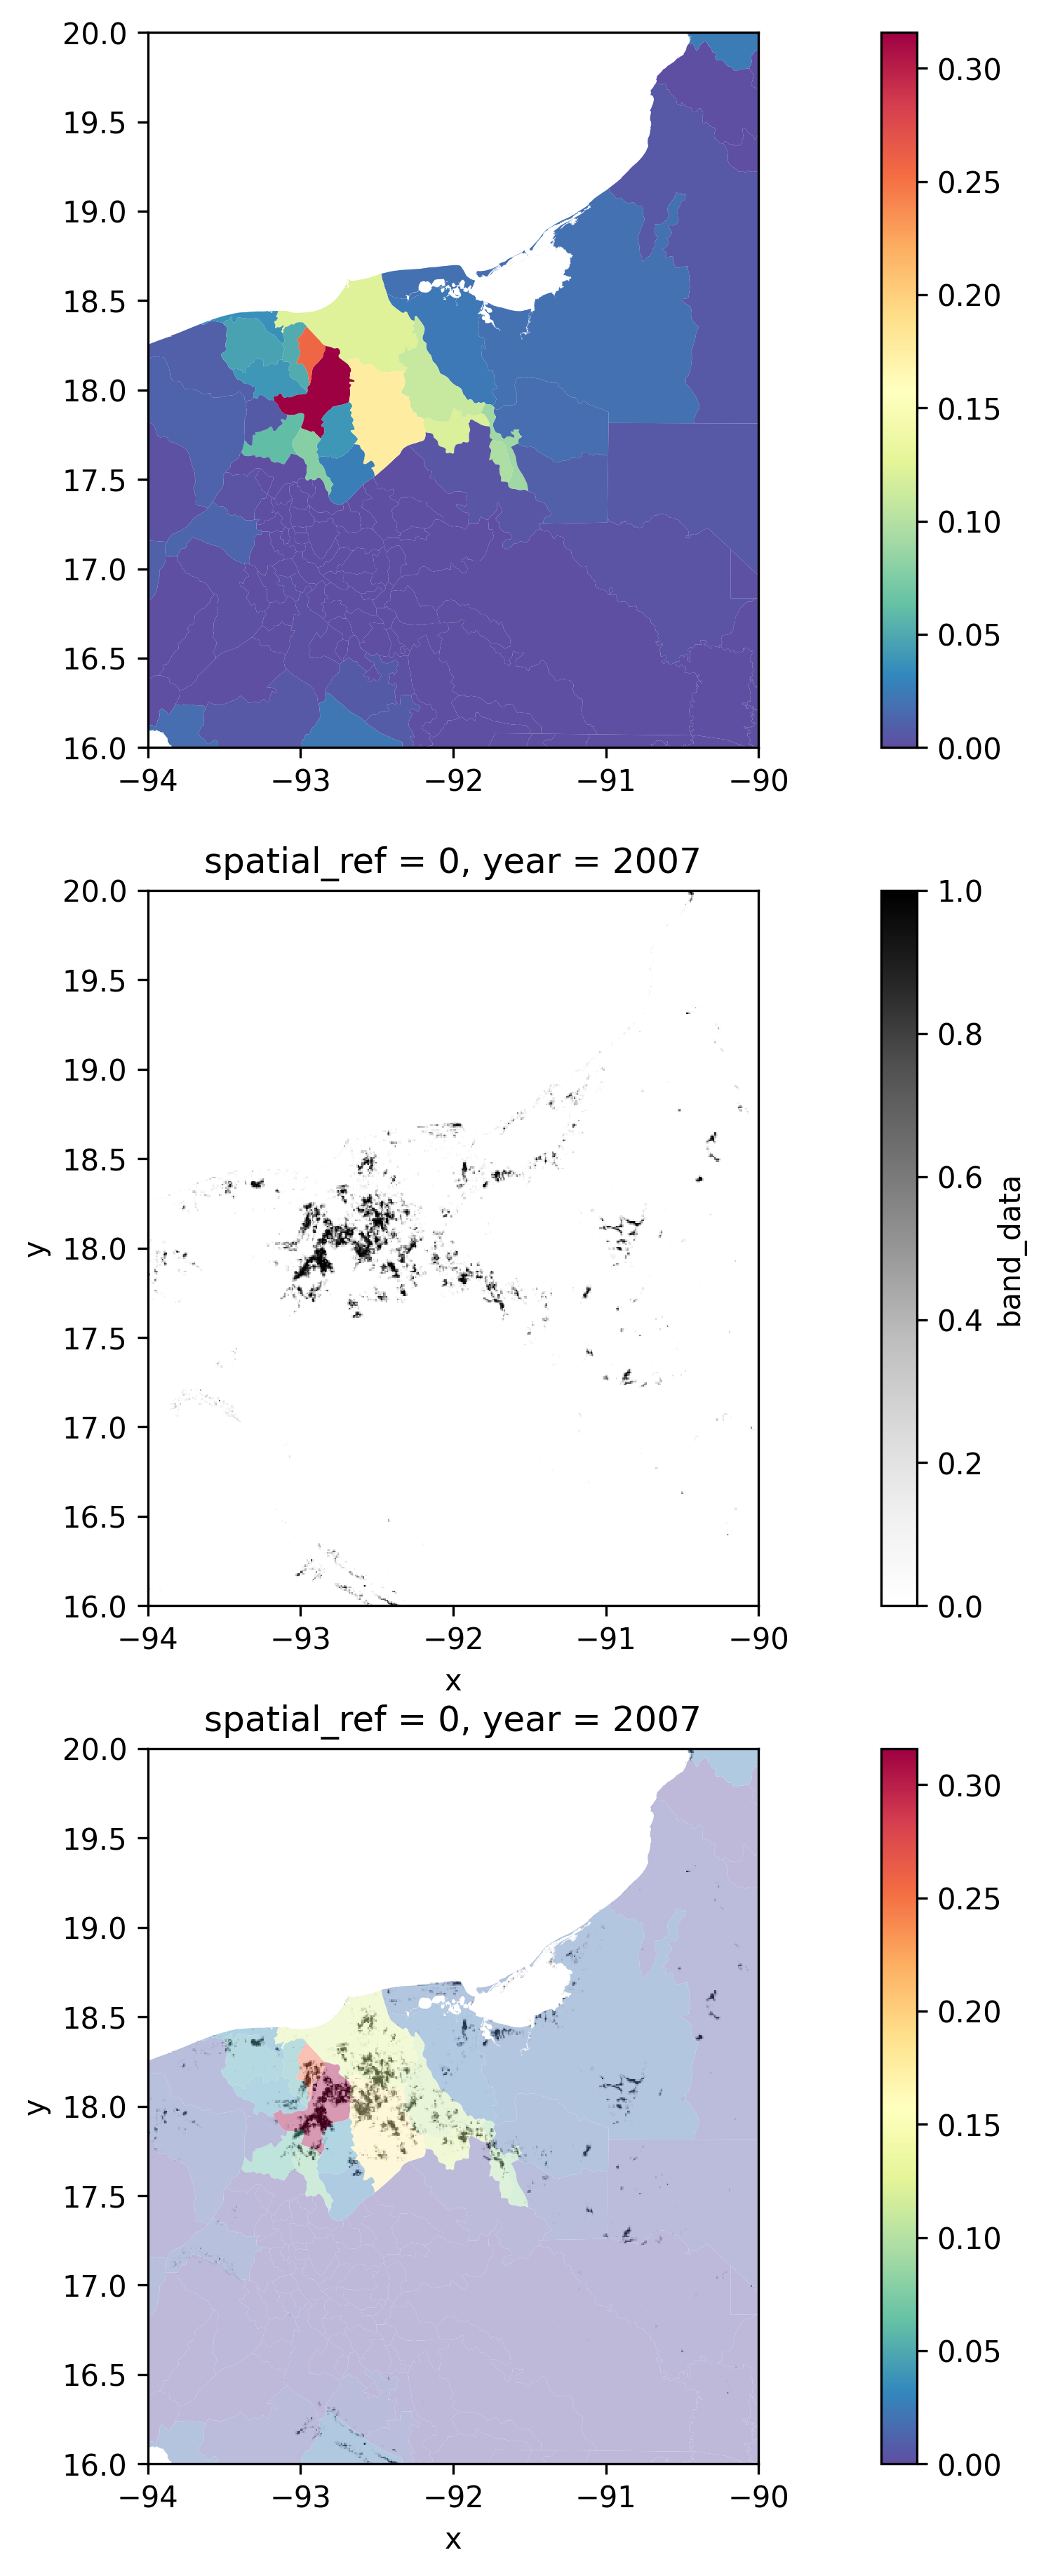

In [4]:
# Chequeamos inundaciones por territorio

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "floods_flooded"
chunk = 2
year = 2007
var = "band_data"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{DATA_PROC}\WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)

ds = xr.open_dataset(rf"{DATA_OUT}\GFD_floods_{year}.nc")
#chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
chunk_bounds = [-94, 16, -90, 20]
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))
#ds = ds.sel(x=slice(-90, -80), y=slice(20, 15))


### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="area_affected", ax=axs[1], legend=False, cmap="Spectral_r", alpha=0) # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")
ds[f"{var}"].plot(ax=axs[1], cmap="Greys")
ds[f"{var}"].plot(ax=axs[2], cmap="Greys", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[1], chunk_bounds[3])


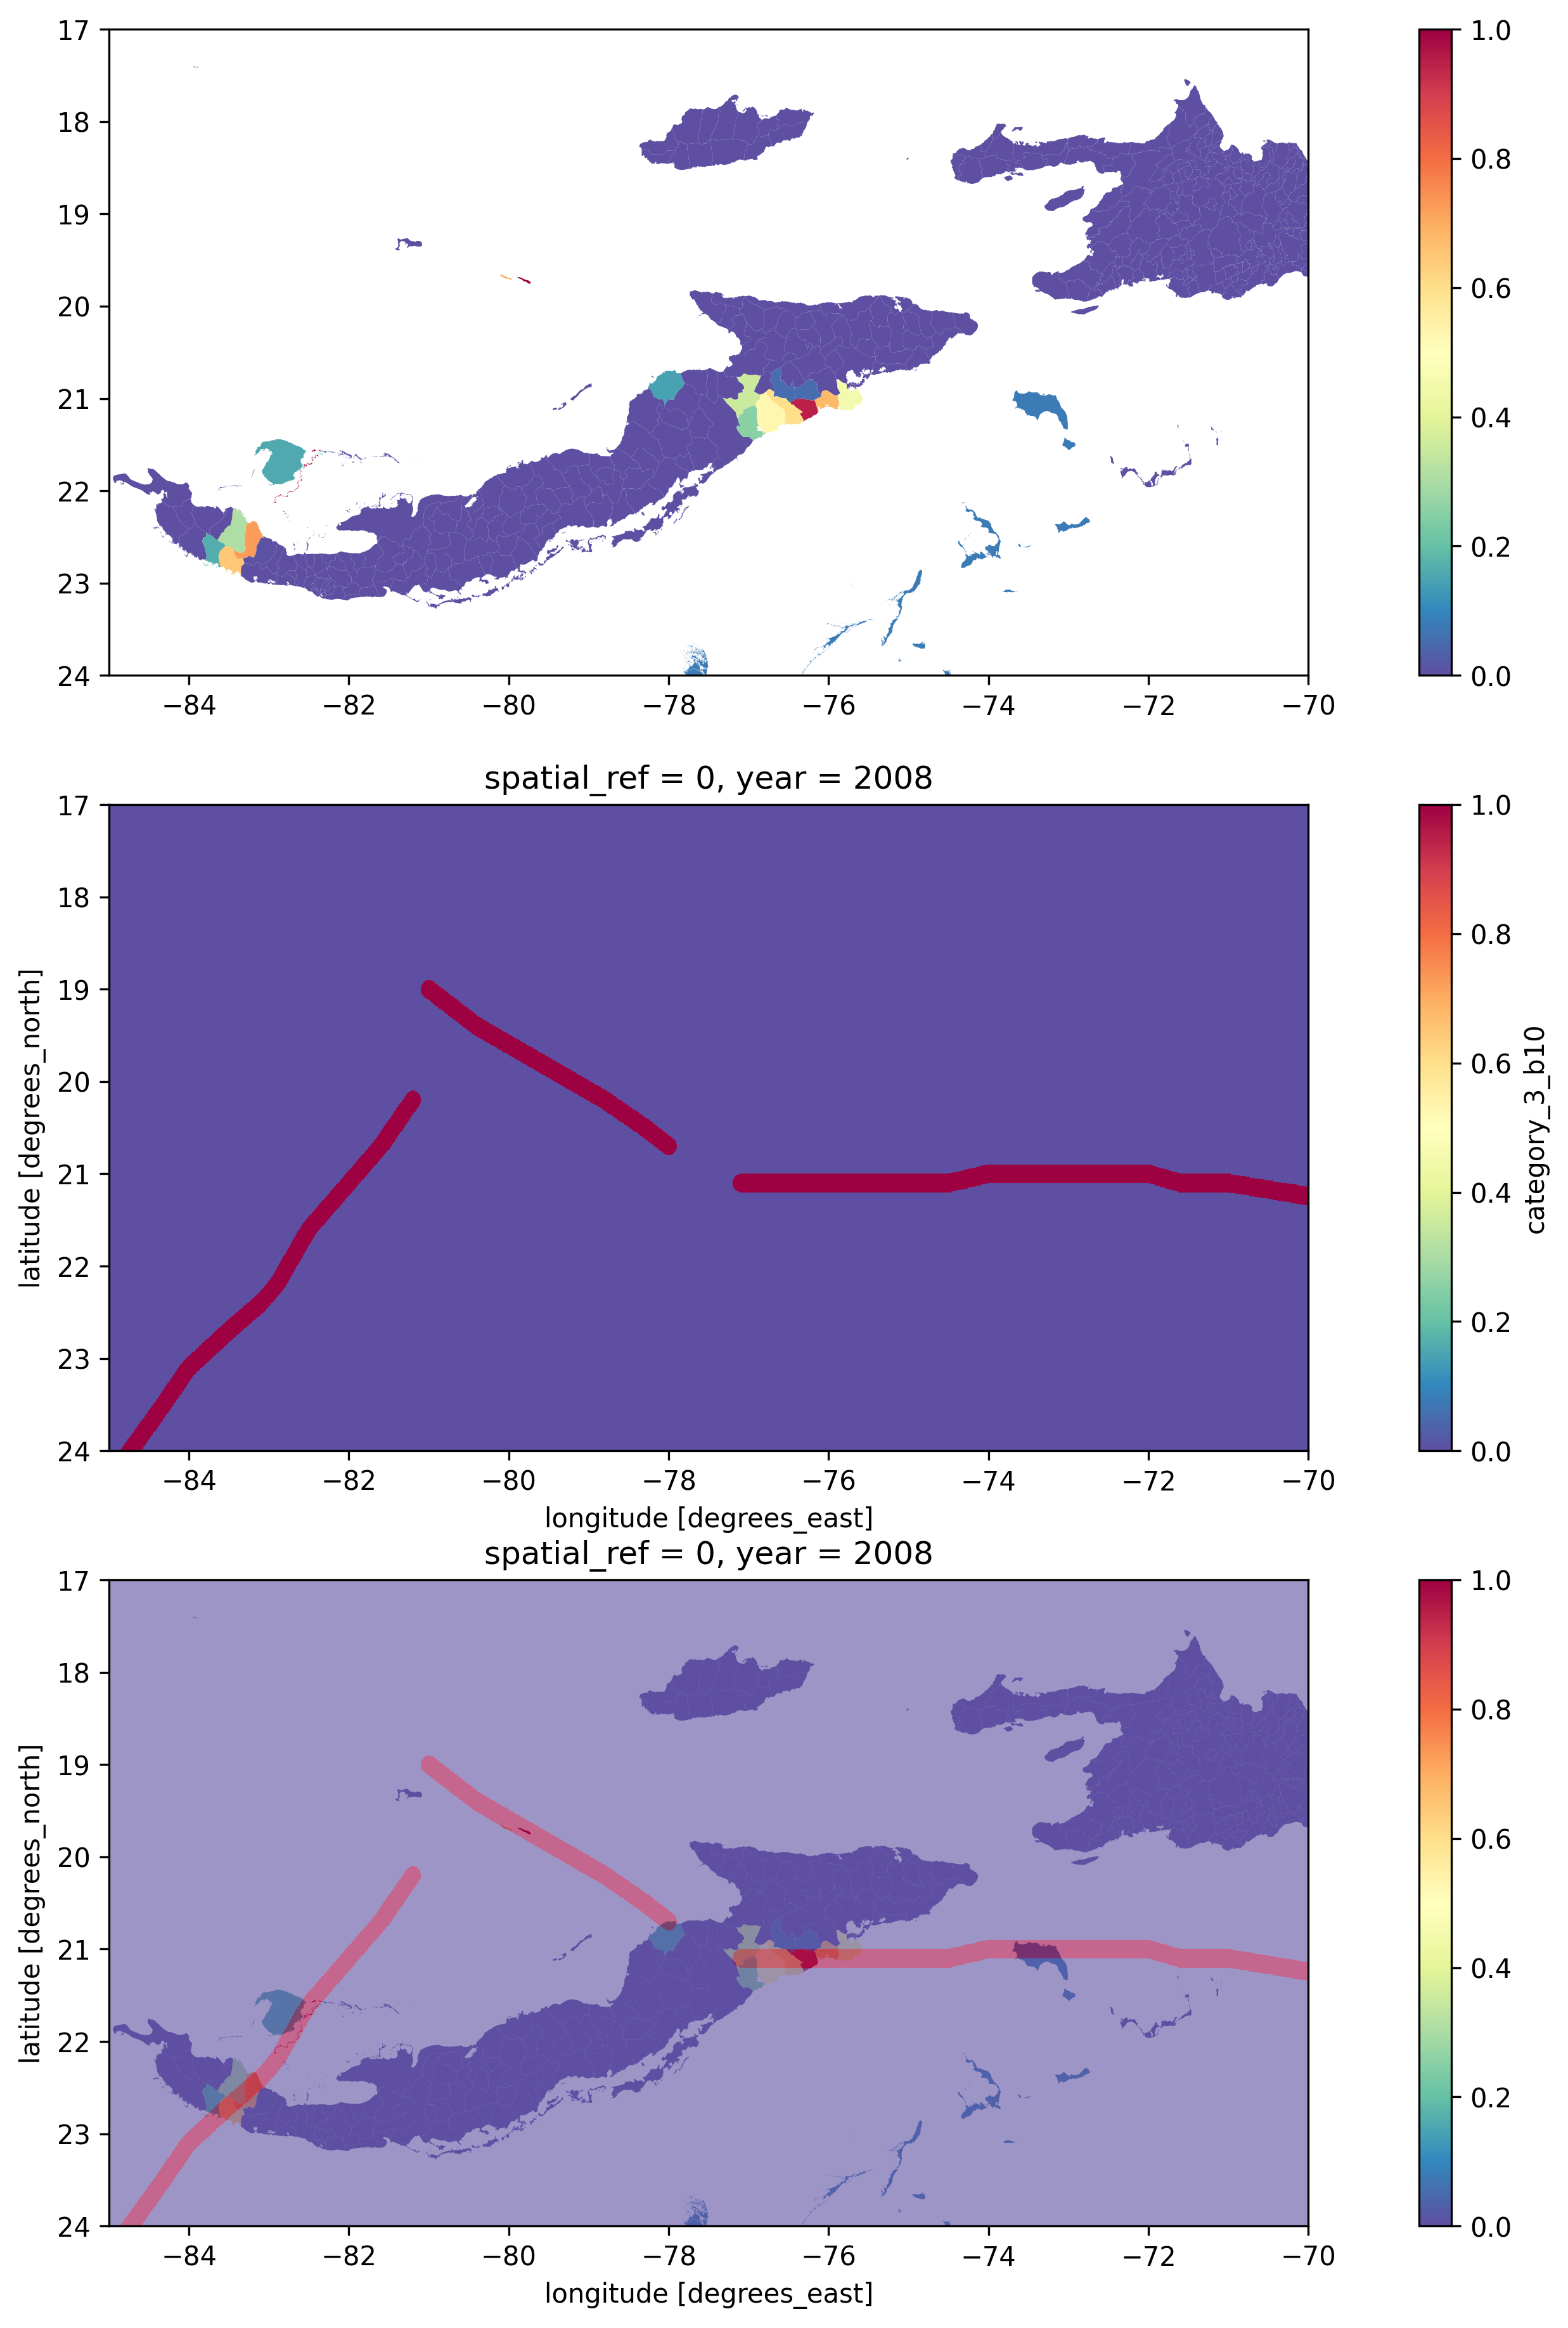

In [11]:
# Chequeamos huracanes por territorio

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "hurricanes"
chunk = 6
year = 2008
var = "category_3_b10"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{var}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{PATH}/WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)

ds = xr.open_dataset(rf"{PATH}/IBTrACS_hurricanes_yearly.nc")
chunk_bounds = [-85, 17, -70, 24]
#chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]), year=year)
#print(ds.variables)

### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="area_affected", ax=axs[1], legend=False, cmap="Spectral_r", alpha=0) # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")

ds[f"{var}"].astype(int).plot(ax=axs[1], cmap="Spectral_r")
ds[f"{var}"].astype(int).plot(ax=axs[2], cmap="Spectral_r", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[3], chunk_bounds[1])

Ahora controlamos los mapas por población

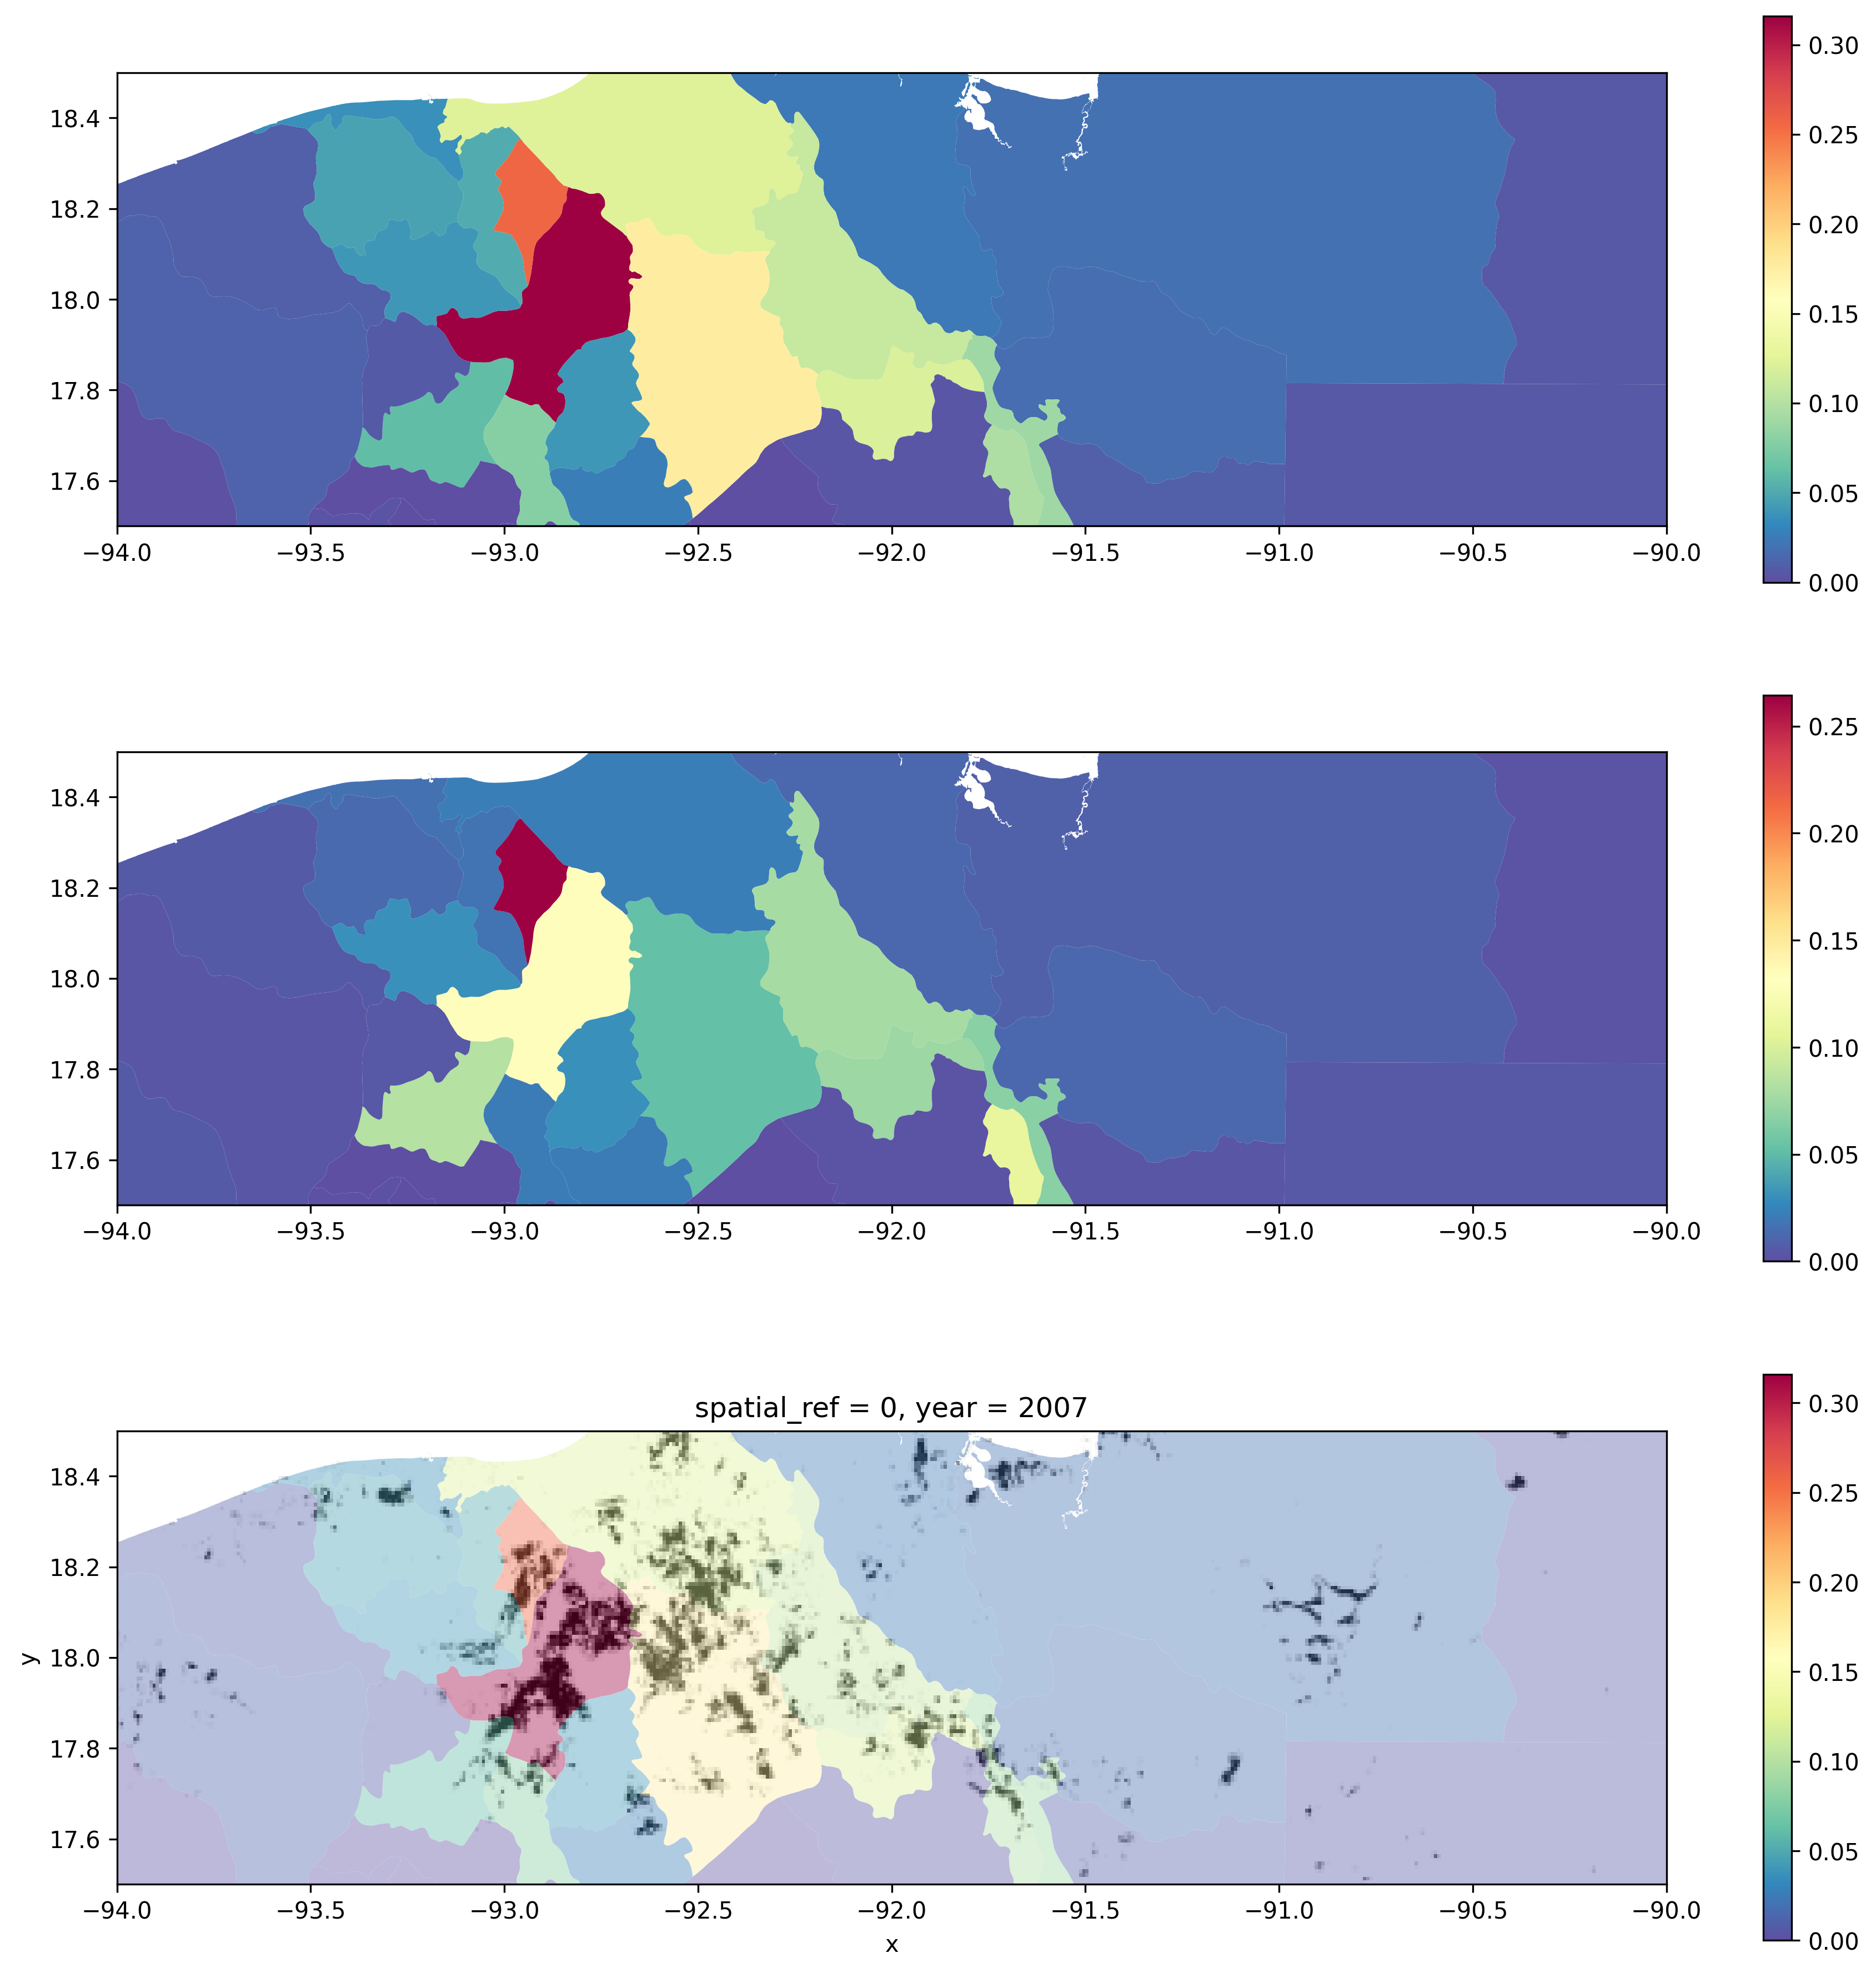

In [12]:
# Chequeamos inundaciones con población

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "floods_flooded"
chunk = 2
year = 2007
var = "band_data"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{DATA_PROC}\WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)
merged["population_affected"] = (merged["population_affected_n"] / merged["total_population"]).fillna(0)

ds = xr.open_dataset(rf"{DATA_OUT}\GFD_floods_{year}.nc")
#chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
chunk_bounds = [-94, 17.5, -90, 18.5]
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))
#ds = ds.sel(x=slice(-90, -80), y=slice(20, 15))


### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="population_affected", ax=axs[1], legend=True, cmap="Spectral_r") # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")
ds[f"{var}"].plot(ax=axs[2], cmap="Greys", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[1], chunk_bounds[3])


<Axes: title={'center': 'spatial_ref = 0, year = 2007'}, xlabel='x', ylabel='y'>

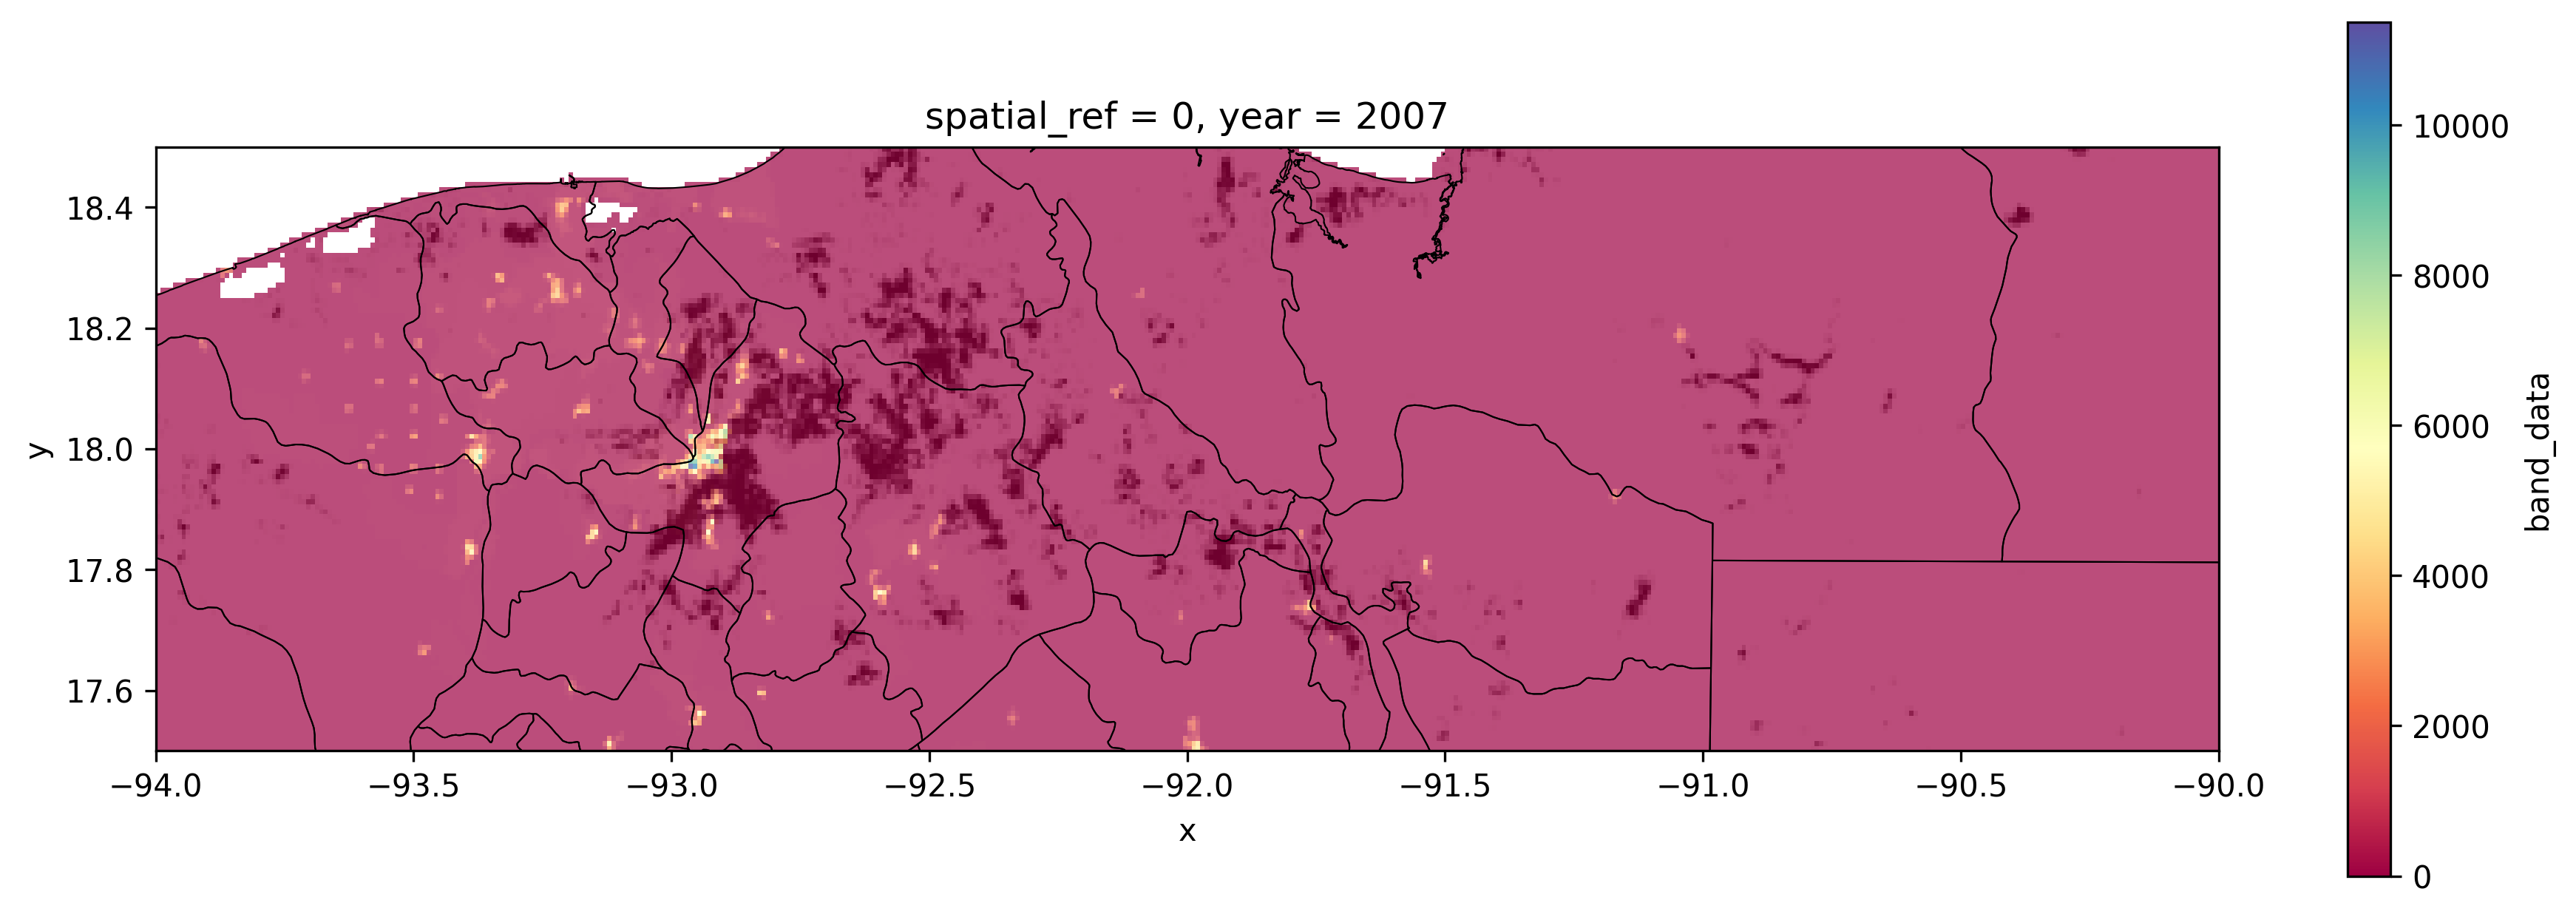

In [13]:
# Superponemos gráfico de inundaciones con población afectada
gpw = xr.open_dataset(r"C:\Users\pilih\Documents\World Bank\Client\shocks_fp\gpw_v4_population_count_rev11_2010_30_sec.tif")
chunk_bounds = [-94, 17.5, -90, 18.5]
gpw_filtered = gpw.sel(band=1, x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))
fig,ax=plt.subplots(1,1,figsize=(15,5),dpi=300)
gpw_filtered["band_data"].plot(cmap="Spectral")
ds[f"{var}"].plot(ax=ax, cmap="Greys", add_colorbar=False, alpha=0.3)
merged.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

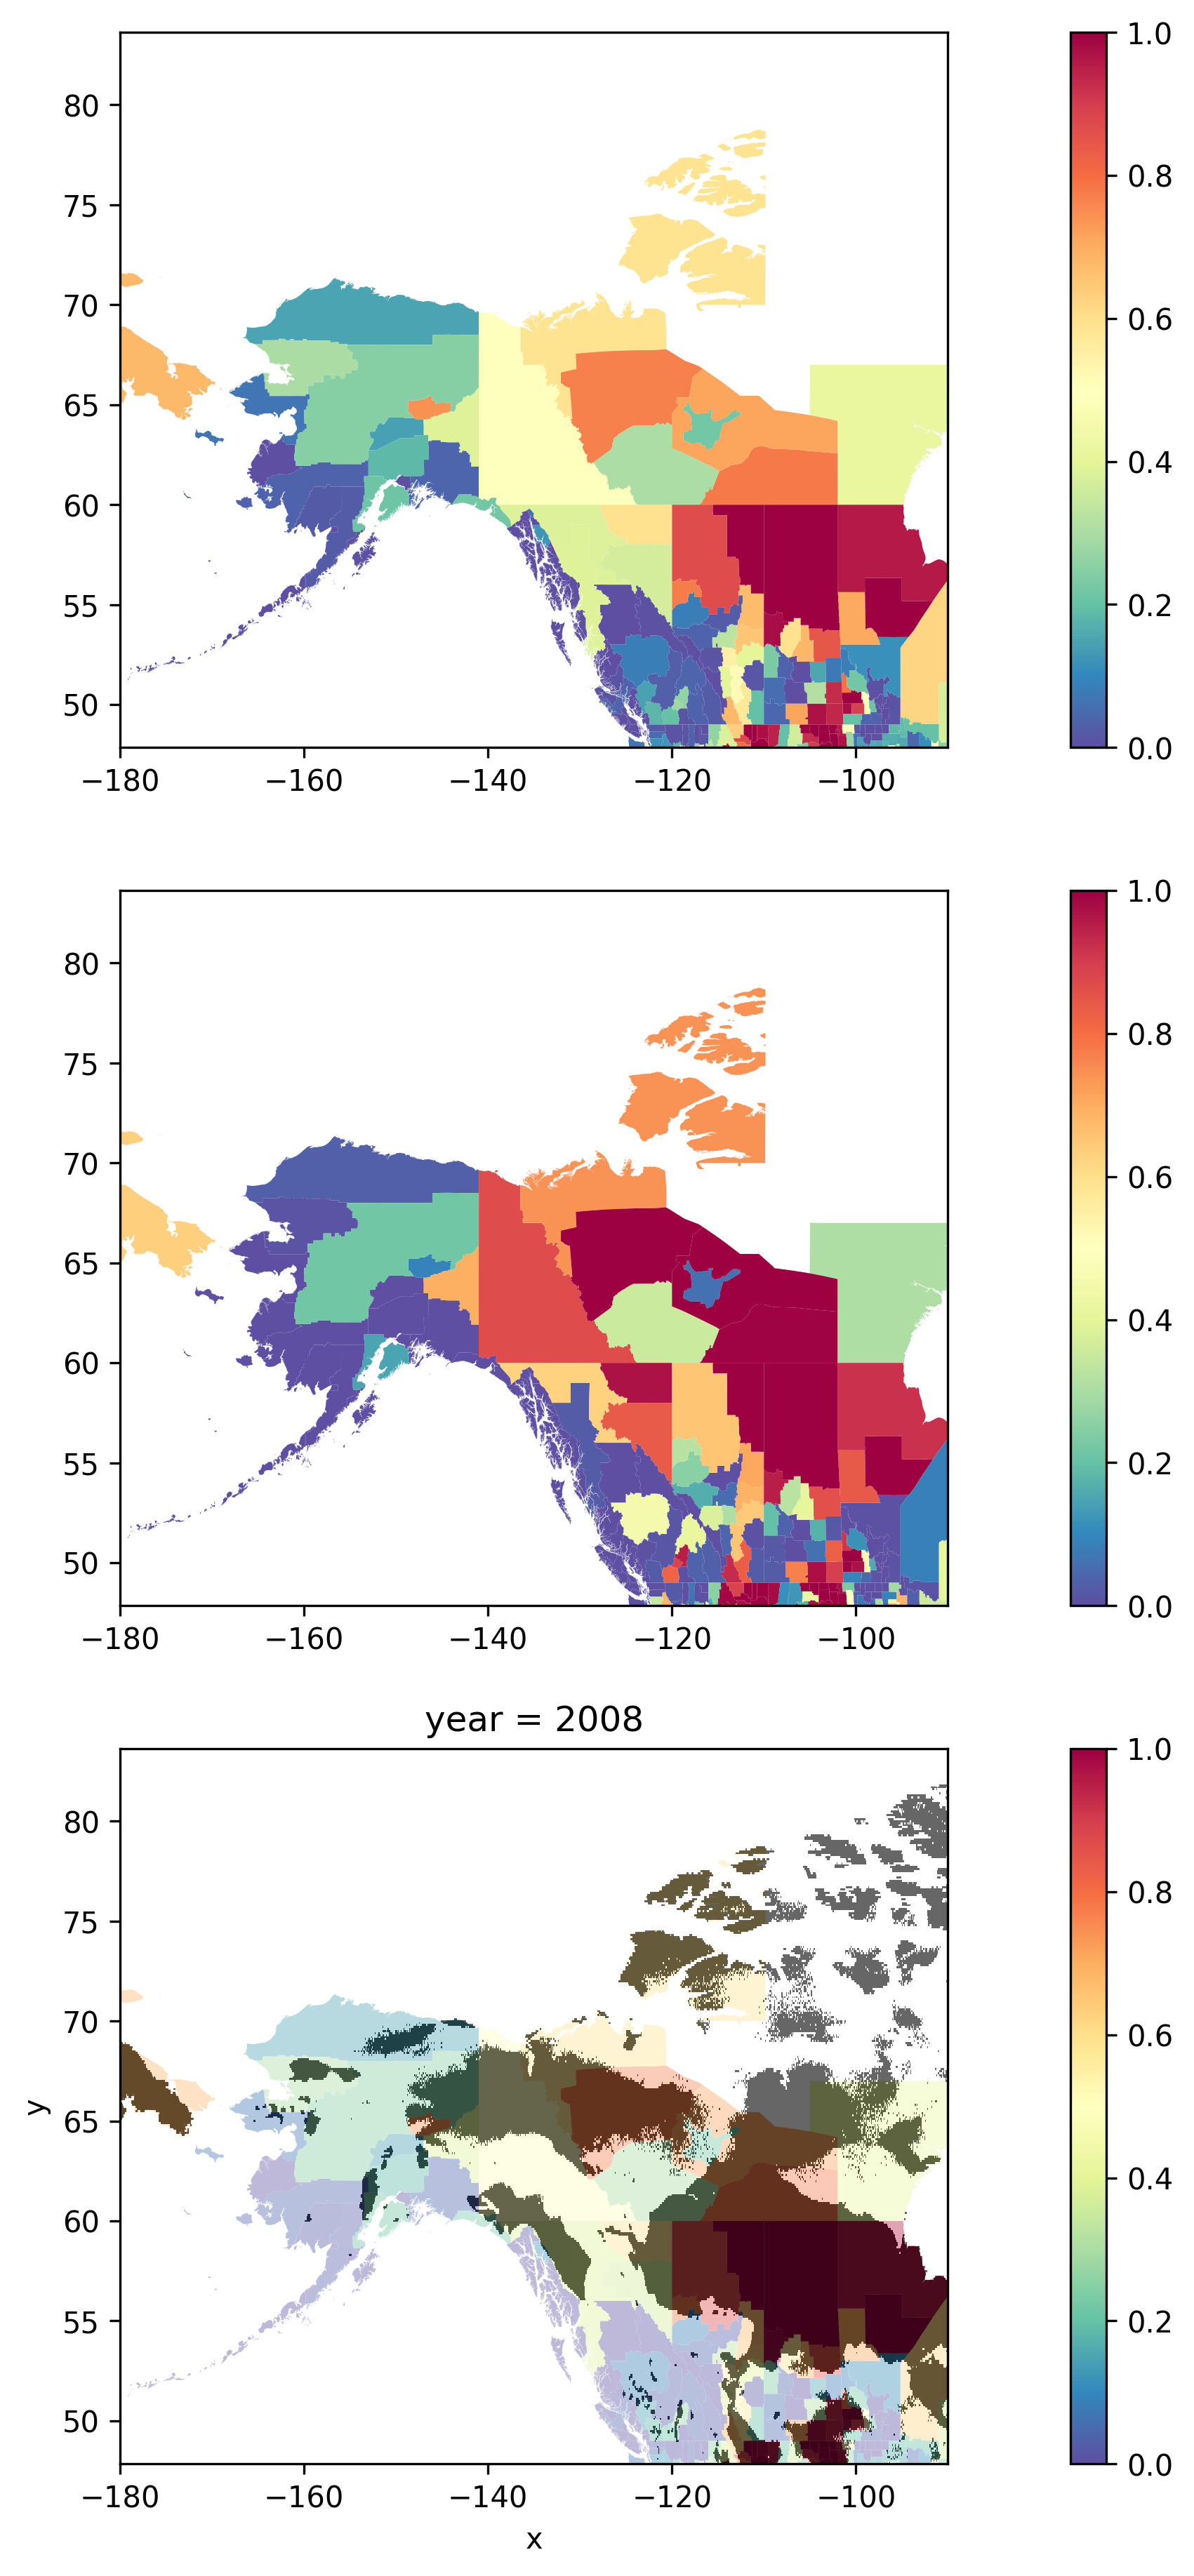

In [26]:
# Chequeamos sequias con población

import utils
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

PATH = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_RAW = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_PROC = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"
DATA_OUT = "C:/Users/pilih/Documents/World Bank/Client/shocks_fp"

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "drought"
chunk = 3
year = 2008
var = "SPEI3_10sd"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{var}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{DATA_PROC}\WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)
merged["population_affected"] = (merged["population_affected_n"] / merged["total_population"]).fillna(0)


ds = xr.open_dataset(rf"{DATA_OUT}\ERA5_droughts_{year}.nc")
chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))

### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="population_affected", ax=axs[1], legend=True, cmap="Spectral_r") # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")
ds[f"{var}"].plot(ax=axs[2], cmap="Greys", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[1], chunk_bounds[3])

<Axes: title={'center': 'year = 2008'}, xlabel='x', ylabel='y'>

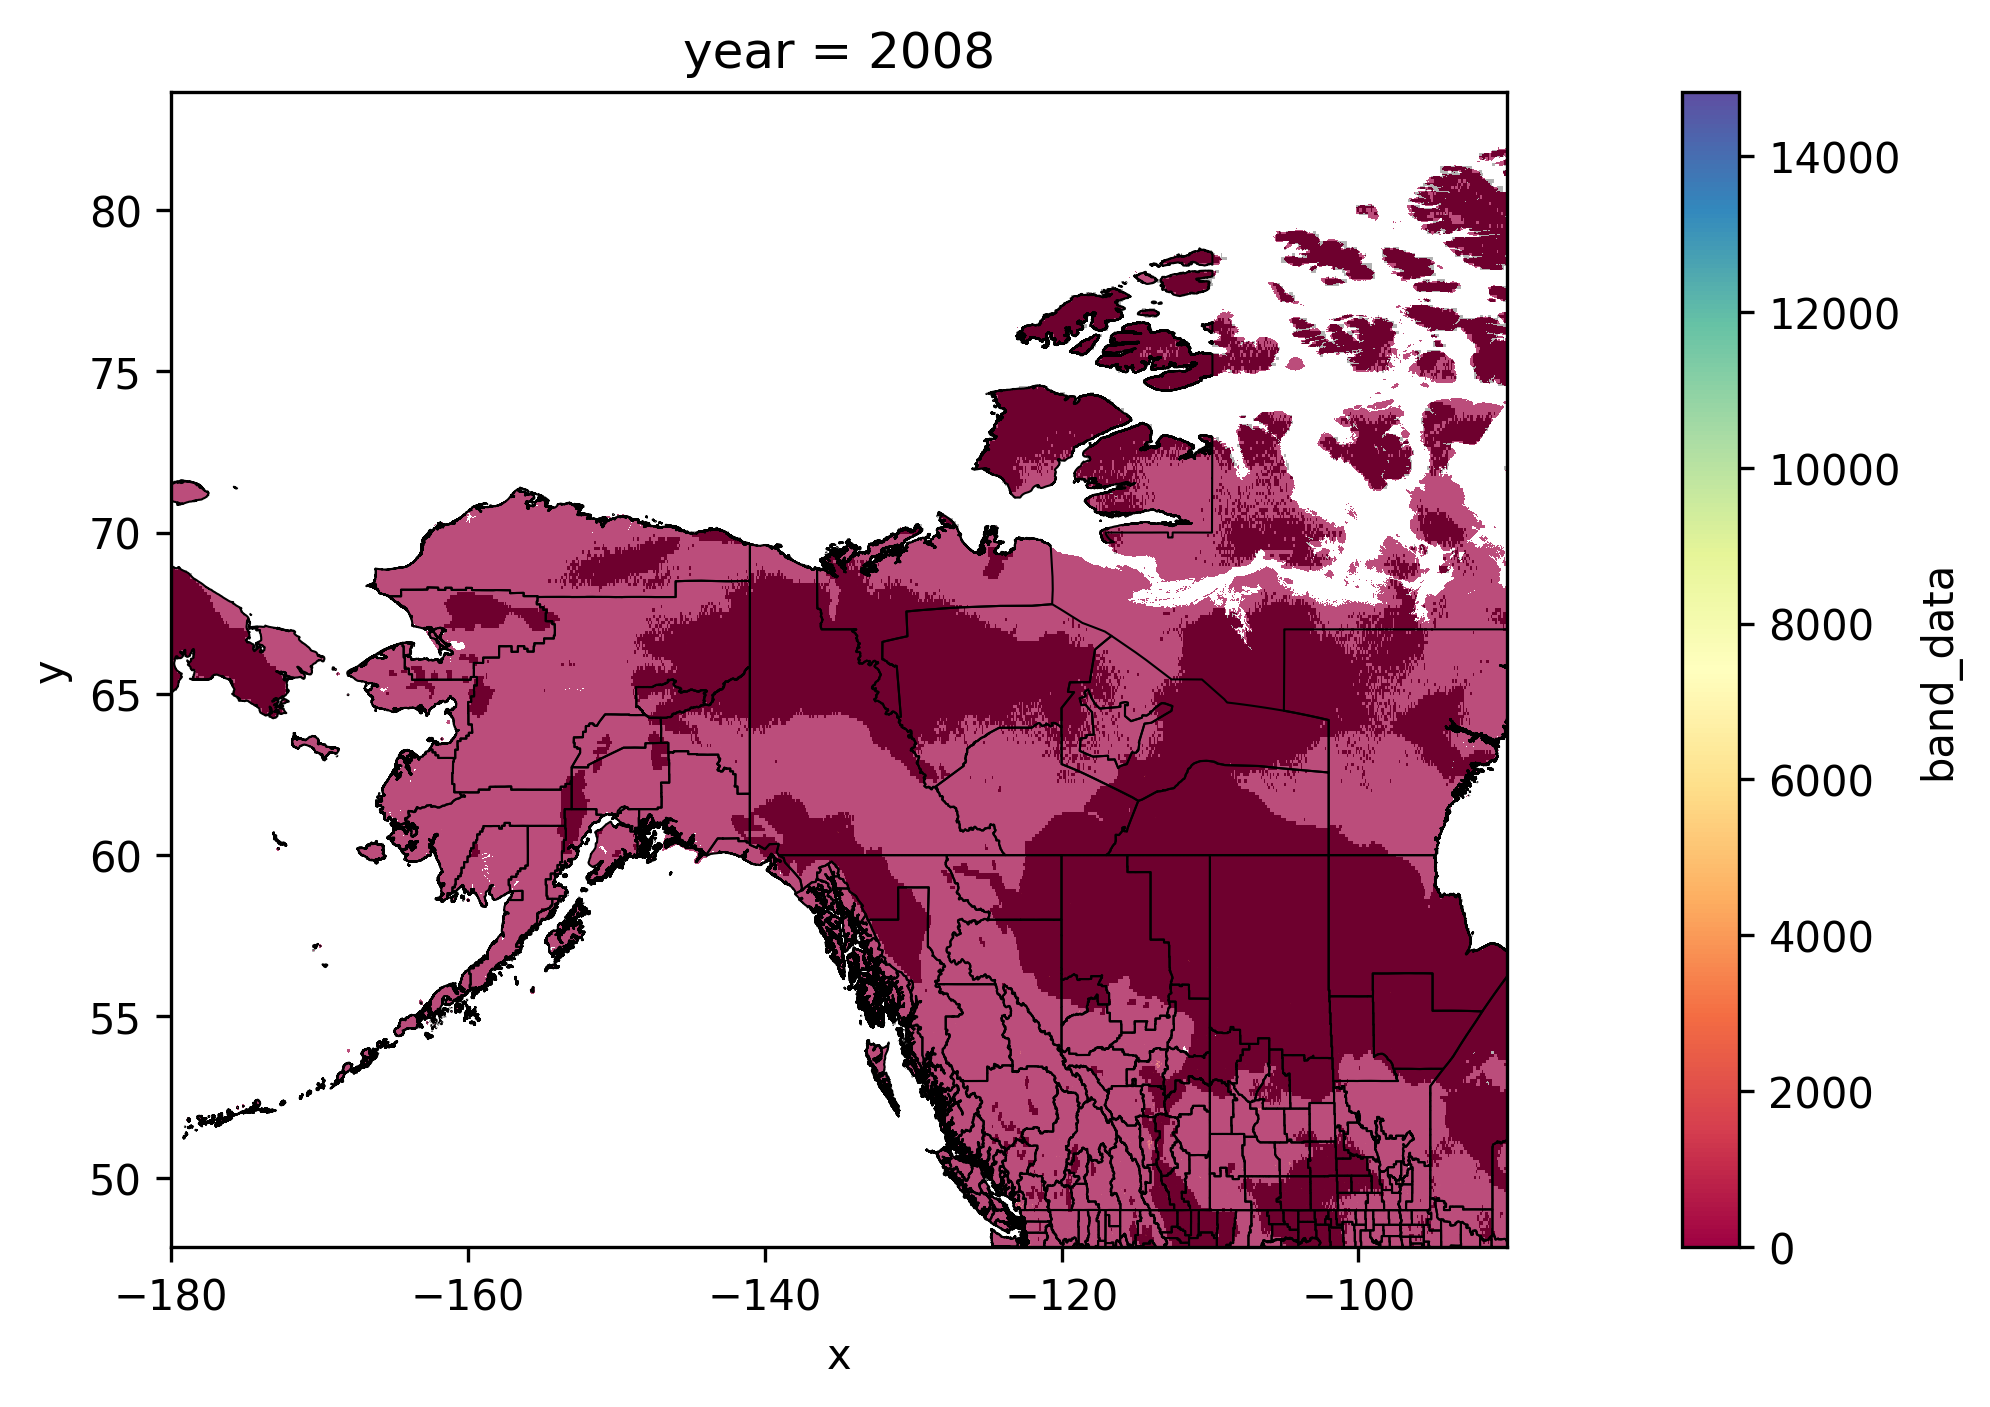

In [27]:
# Superponemos gráfico de sequias con población afectada
gpw = xr.open_dataset(r"C:\Users\pilih\Documents\World Bank\Client\shocks_fp\gpw_v4_population_count_rev11_2010_30_sec.tif")
gpw_filtered = gpw.sel(band=1, x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))
fig,ax=plt.subplots(1,1,figsize=(15,5),dpi=300)
gpw_filtered["band_data"].plot(cmap="Spectral")
ds[f"{var}"].plot(ax=ax, cmap="Greys", add_colorbar=False, alpha=0.3)
merged.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

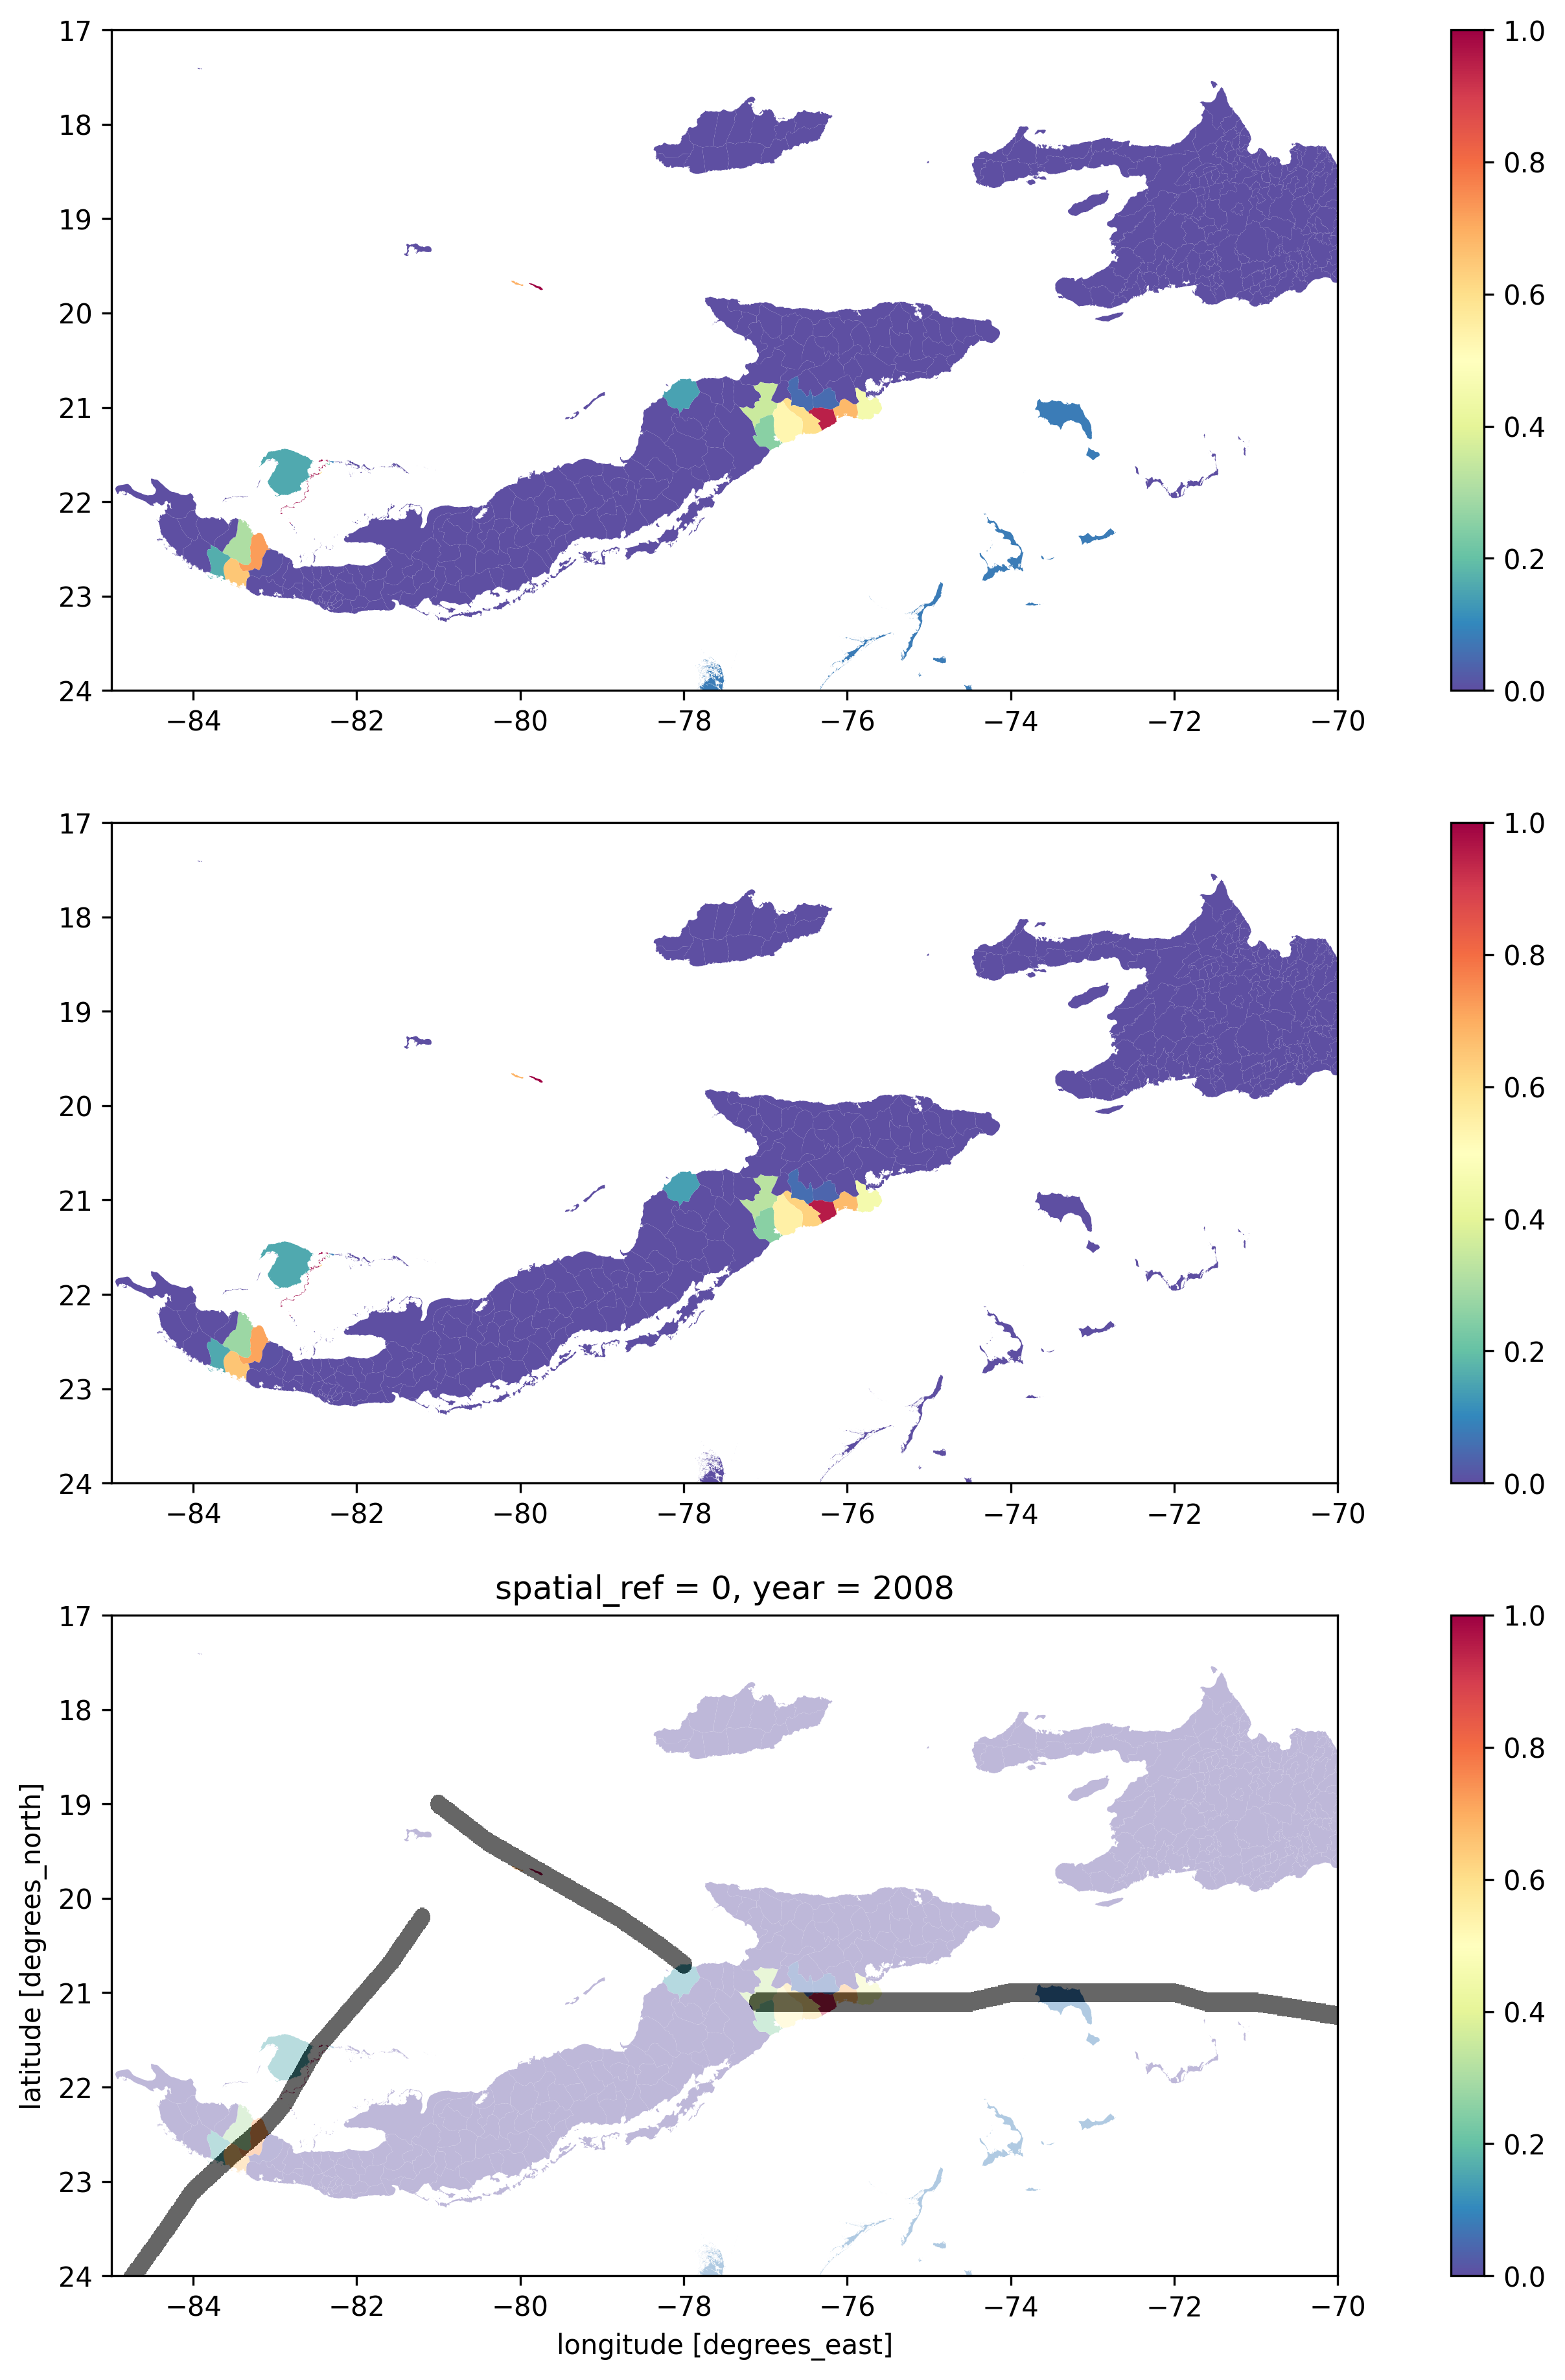

In [35]:
# Chequeamos huracanes por poblacion

TOTAL_CHUNKS = 16 # DEJAR FIJO
shock = "hurricanes"
chunk = 6
year = 2008
var = "category_3_b10"

df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{var}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{PATH}/WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged["area_affected"] = (merged["cells_affected"] / merged["total_cells"]).fillna(0)
merged["population_affected"] = (merged["population_affected_n"] / merged["total_population"]).fillna(0)

ds = xr.open_dataset(rf"{PATH}/IBTrACS_hurricanes_yearly.nc")
chunk_bounds = [-85, 17, -70, 24]
#chunk_bounds = utils.get_bounds_from_chunk_number(chunk, TOTAL_CHUNKS, gdf.total_bounds)
ds = ds.sel(x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]), year=year)
#print(ds.variables)

### GRAFICAR
fig, axs = plt.subplots(3, 1, figsize=(15, 15), dpi=300)

# merged.plot(column="area_affected", ax=axs[1])
merged.plot(column="area_affected", ax=axs[0], legend=True, cmap="Spectral_r")
merged.plot(column="population_affected", ax=axs[1], legend=True, cmap="Spectral_r") # Invisible, para setear los limites iguales
merged.plot(column="area_affected", ax=axs[2], legend=True, cmap="Spectral_r")
ds[f"{var}"].plot(ax=axs[2], cmap="Greys", add_colorbar=False, alpha=0.6)

for ax in axs:
    ax.set_xlim(chunk_bounds[0], chunk_bounds[2])
    ax.set_ylim(chunk_bounds[3], chunk_bounds[1])

<Axes: title={'center': 'spatial_ref = 0, year = 2008'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

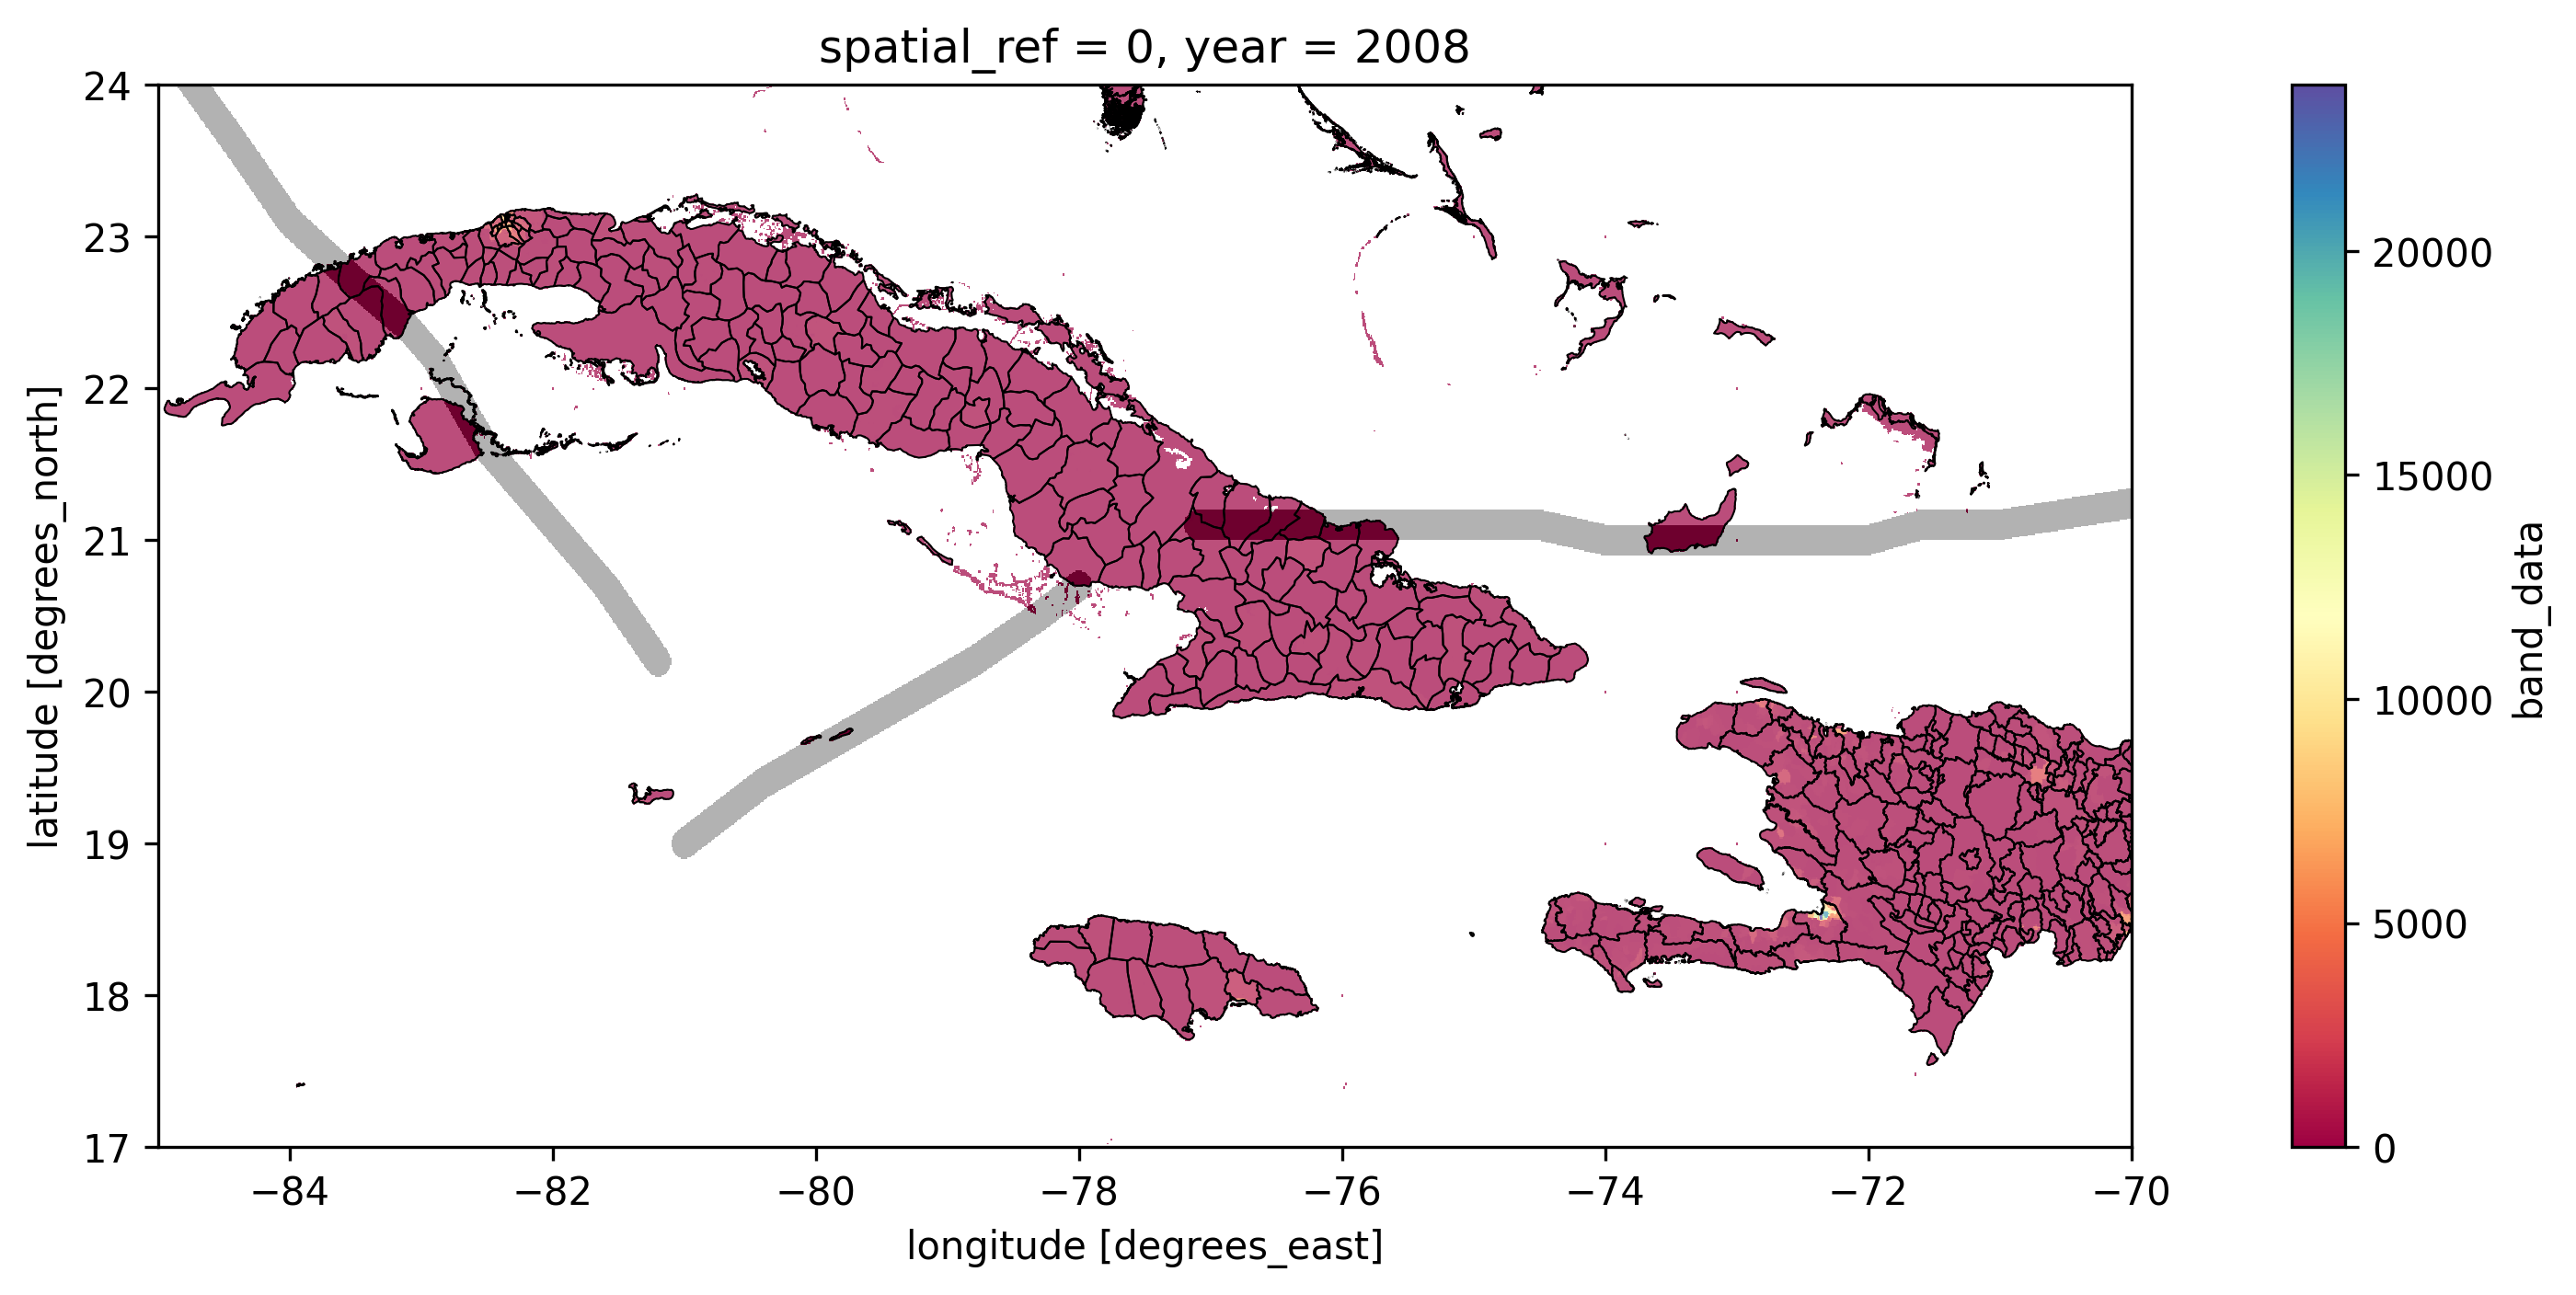

In [36]:
# Superponemos gráfico de huracanes con población afectada
gpw = xr.open_dataset(r"C:\Users\pilih\Documents\World Bank\Client\shocks_fp\gpw_v4_population_count_rev11_2010_30_sec.tif")
gpw_filtered = gpw.sel(band=1, x=slice(chunk_bounds[0], chunk_bounds[2]), y=slice(chunk_bounds[3], chunk_bounds[1]))
fig,ax=plt.subplots(1,1,figsize=(15,5),dpi=300)
gpw_filtered["band_data"].plot(cmap="Spectral")
ds[f"{var}"].plot(ax=ax, cmap="Greys", add_colorbar=False, alpha=0.3)
merged.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)

In [33]:
# Chequeamos los Na en población
# Probamos distintos chunks (2, 4, 6, 7)
shock = "floods_flooded"
year = 2010
chunk = 7
df = pd.read_parquet(rf"{DATA_PROC}/WB_{shock}_{year}_{chunk}_zonal_stats.parquet")
gdf = gpd.read_feather(rf"{DATA_PROC}\WB_country_IDs.feather")
merged = gdf.merge(df, left_on="ID", right_index=True, validate="1:1")
merged[merged.total_population.isna()].explore()